<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/CRIA%C3%87%C3%83O_DE_FUN%C3%87%C3%83O_PARA_EXTRA%C3%87%C3%83O_DE_TODOS_OS_FUNDOS_v_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "300">

# **Funções para captura de dados dos fundos**

## Configuração inicial dos parâmetros

Criação de função para determinar a lista com períodos entre início e fim

In [ ]:
import time

import pandas as pd

import datetime

In [ ]:
def create_interval(start_date, end_date):

  b = list()

  end = str(datetime.datetime.strptime(end_date, '%Y-%m-%d').year) + '{:02d}'.format(datetime.datetime.strptime(end_date, '%Y-%m-%d').month +1)

  for year in range(int(datetime.datetime.strptime(start_date, '%Y-%m-%d').year), int(datetime.datetime.strptime(end_date, '%Y-%m-%d').year)+1):

    for month in range(1,13):

      a = '{:02d}{:02d}'.format(year, month)

      if a == end:
        break

      b.append(a)

    if a == end:
        break

    year = year +1

  return b

Função para extração de fato dos dados

In [ ]:
def extract_fund_data(dates_list, verbose = False):

  start_time = time.time()

  # Initialize an empty list to store individual DataFrames
  dataframes = []

  # Iterate through the files in the folder
  for i in dates_list:

    url_pre = f'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{i}.zip'

    df_loc = pd.read_csv(url_pre, sep=';', compression='zip')

    s = datetime.datetime.strptime(i, "%Y%m")

    date = s.strftime('%B %Y')

    if verbose == True:
      print("Extraction of month",date,"finished")

    # Append the DataFrame to the list
    dataframes.append(df_loc)

  # Combine all DataFrames in the list into one large DataFrame
  combined_df = pd.concat(dataframes, ignore_index=True)

  if verbose == True:
    print("Process took %s seconds" % (time.time() - start_time))

  return combined_df

Terceira função: filtro por fundo e por data

In [ ]:
def get_fund_data(start, end, cnpj:object = None, verbose = False):

  interval = create_interval(start, end)

  data_fund = extract_fund_data(interval, verbose)

  data_fund['DT_COMPTC'] = pd.to_datetime(data_fund['DT_COMPTC'])

  mask = (data_fund['DT_COMPTC'] >= start) & (data_fund['DT_COMPTC'] <= end)

  data_fund = data_fund.loc[mask]

  if cnpj != None:

    data_fund = data_fund[data_fund['CNPJ_FUNDO'] == cnpj]

  else:

    data_fund = data_fund

  return data_fund.reset_index(drop=True)

Extraindo todos os fundos

In [ ]:
todososfundos = get_fund_data('2022-01-01', '2022-02-26', verbose = False)

In [ ]:
todososfundos

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2022-01-03,1075476.00,28.110273,1078462.74,0.0,0.00,1
1,FI,00.017.024/0001-53,2022-01-04,1075873.10,28.118682,1078785.36,0.0,0.00,1
2,FI,00.017.024/0001-53,2022-01-05,1076280.19,28.127768,1079133.95,0.0,0.00,1
3,FI,00.017.024/0001-53,2022-01-06,1076680.92,28.137115,1079492.53,0.0,0.00,1
4,FI,00.017.024/0001-53,2022-01-07,1073899.79,28.146295,1076721.79,0.0,3122.94,1
...,...,...,...,...,...,...,...,...,...
918285,FI,97.929.213/0001-34,2022-02-21,71068851.28,9.350865,71060227.06,0.0,0.00,2
918286,FI,97.929.213/0001-34,2022-02-22,71123077.75,9.357950,71114066.69,0.0,0.00,2
918287,FI,97.929.213/0001-34,2022-02-23,71199491.30,9.367954,71190093.12,0.0,0.00,2
918288,FI,97.929.213/0001-34,2022-02-24,71230906.84,9.372037,71221121.41,0.0,0.00,2


In [ ]:
todososfundos.index = pd.to_datetime(todososfundos['DT_COMPTC'])

Extraindo um fundo específico

In [ ]:
fundo_especifico = get_fund_data(start_date, '2022-02-26', cnpj = '97.929.213/0001-34')

Extraction of month January 2022 finished
Extraction of month February 2022 finished
Process took 7.3227574825286865 seconds


In [ ]:
fundo_especifico.index = pd.to_datetime(fundo_especifico['DT_COMPTC'])

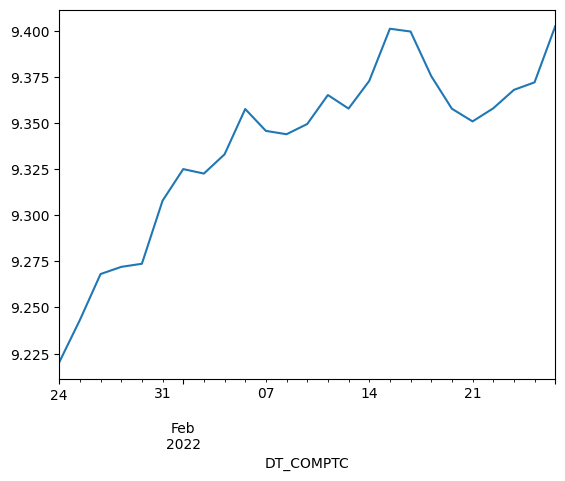

In [ ]:
fundo_especifico.VL_QUOTA.plot();

## Calculando a média das variáveis para os fundos

In [ ]:
medias_fundos = todososfundos.groupby(by='CNPJ_FUNDO', axis = 0).mean()

<ipython-input-84-9aa526ac070c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medias_fundos = todososfundos.groupby(by='CNPJ_FUNDO', axis = 0).mean()


In [ ]:
medias_fundos

,index,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
CNPJ_FUNDO,,,,,,,
00.017.024/0001-53,2.689536e+06,1.072728e+06,29.426152,1.077879e+06,0.000000e+00,3.118160e+02,1.000000
00.068.305/0001-35,2.689557e+06,3.816193e+07,29.855772,3.814863e+07,0.000000e+00,2.220750e+04,6504.131474
00.071.477/0001-68,2.689577e+06,1.416409e+10,10.776951,1.416297e+10,6.326863e+08,7.603136e+08,145101.828685
00.073.041/0001-08,2.689598e+06,1.323567e+07,31.354754,1.322779e+07,0.000000e+00,8.955055e+03,852.856574
00.083.181/0001-67,2.689619e+06,1.662166e+10,747.269768,1.637426e+10,0.000000e+00,7.628791e+06,4.000000
...,...,...,...,...,...,...,...
97.548.164/0001-90,3.190536e+06,6.437157e+07,0.164146,6.458635e+07,0.000000e+00,0.000000e+00,1.000000
97.548.167/0001-23,3.187350e+06,6.242524e+09,4.012452,6.181491e+09,1.756831e+06,1.849168e+07,14.155378
97.711.801/0001-05,3.187371e+06,8.139783e+07,2.723262,8.143117e+07,0.000000e+00,0.000000e+00,1.000000


Ordendando por patrimônio líquido para encontrar os 10 maiores

In [ ]:
medias_fundos.sort_values('VL_PATRIM_LIQ', ascending = False).head(10)

,index,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
CNPJ_FUNDO,,,,,,,
07.593.972/0001-86,2.729155e+06,1.278785e+11,5.009023,1.278783e+11,5.767949e+08,5.298403e+08,308.115538
01.608.573/0001-65,2.693323e+06,1.222334e+11,16.542225,1.222217e+11,2.640867e+09,3.153534e+09,35.721116
46.133.770/0001-03,4.455945e+06,1.173840e+11,101.867671,1.173830e+11,3.078318e+09,2.381048e+09,1.000000
27.146.328/0001-77,2.899865e+06,1.092864e+11,1.348122,1.092856e+11,3.184075e+09,3.374902e+09,8.354582
01.597.187/0001-15,2.693050e+06,1.018903e+11,277.500573,1.018948e+11,1.078025e+09,1.047207e+09,50.908367
00.822.055/0001-87,2.690520e+06,9.808058e+10,46.111773,9.807989e+10,5.886736e+07,5.575957e+07,1.000000
42.592.315/0001-15,3.145974e+06,9.607631e+10,1.057692,9.607427e+10,2.662153e+09,1.907605e+09,10942.521912
42.592.302/0001-46,1.506490e+06,6.604199e+10,1.039479,6.604217e+10,2.058049e+09,2.240862e+09,1.009009
03.737.219/0001-66,2.702547e+06,5.578069e+10,5.170977,5.580020e+10,6.846009e+06,3.085803e+07,9.000000


Vamos explorar algum outro fundo

Exemplo: SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS

CNPJ: 08.336.054/0001-34

https://www.sicredi.com.br/site/investimentos/fundos-investimentos/fi-acoes-petrobras/

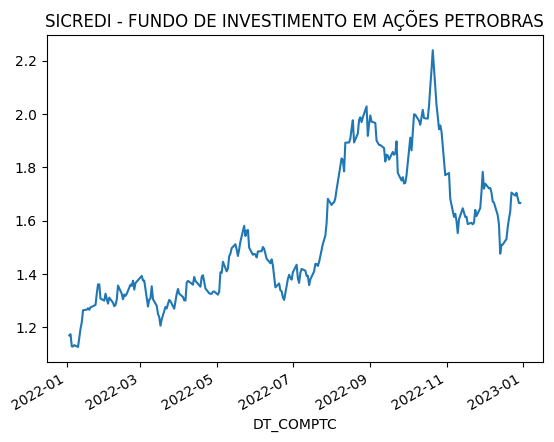

In [ ]:
fundo = todososfundos[todososfundos['CNPJ_FUNDO'] == '08.336.054/0001-34']

fundo.VL_QUOTA.plot(title = 'SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS');